# import

In [1]:
import os
import random
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET

# DATAS

In [165]:
def get_random_doggo(directory="./Datas/Images",directory_annotation="./Datas/Annotation"):
    '''
    get a path to a random picture of dog

    input : path to the main folder containing race/pictures
    
    return : path to a doggo picture, path to the corresponding annotation
    '''
    subdirs = [os.path.join(directory, subdir) for subdir in os.listdir(directory) if os.path.isdir(os.path.join(directory, subdir))]
    if not subdirs:
        raise ValueError("ERROR : no race folder found")
    random_subdir = random.choice(subdirs)
    image_paths = [os.path.join(random_subdir, file) for file in os.listdir(random_subdir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_paths:
        raise ValueError("ERROR : no picture found in race folder")
    random_image_path = random.choice(image_paths)

    random_image_annotation_path = os.path.join(directory_annotation,random_image_path.split("\\")[-2])
    random_image_annotation_path = os.path.join(random_image_annotation_path,random_image_path.split(".")[-2].split("\\")[-1])
    return random_image_path, random_image_annotation_path

FICHIER :  ./Datas/Images\n02111889-Samoyed\n02111889_3960.jpg
ANNOTATION :  ./Datas/Annotation\n02111889-Samoyed\n02111889_3960


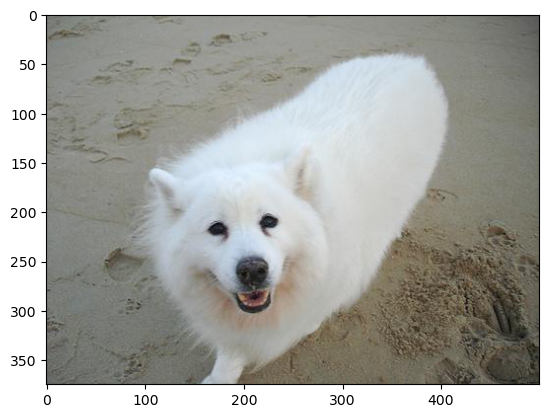

In [166]:
path_to_doggo, path_to_doggo_annotation = get_random_doggo()
print("FICHIER : " ,path_to_doggo)
print("ANNOTATION : " ,path_to_doggo_annotation)
random_dogo = Image.open(path_to_doggo)
plt.imshow(random_dogo)

# Récupération des labels

In [172]:
with open(path_to_doggo_annotation, 'r', encoding='utf-8') as fichier:
    contenu = fichier.read()

# Afficher le contenu du fichier
print(contenu)

<annotation>
	<folder>02111889</folder>
	<filename>n02111889_3960</filename>
	<source>
		<database>ImageNet database</database>
	</source>
	<size>
		<width>500</width>
		<height>375</height>
		<depth>3</depth>
	</size>
	<segment>0</segment>
	<object>
		<name>Samoyed</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>85</xmin>
			<ymin>39</ymin>
			<xmax>406</xmax>
			<ymax>374</ymax>
		</bndbox>
	</object>
</annotation>


In [175]:
def extract_data_from_annotation(file_path, attributes= ['object/name','object/difficult']):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = {}

    for attr in attributes:
        elem = root.find(attr)
        if elem is not None:
            data[attr] = elem.text

    return data

In [176]:
extract_data_from_annotation(path_to_doggo_annotation)

{'object/name': 'Samoyed', 'object/difficult': '0'}

# Traitement de l'image

Taille actuelle :  (500, 363)
Taille resize :  (216, 216)


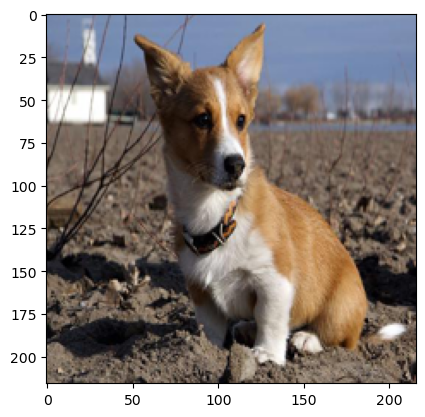

In [4]:
print("Taille actuelle : ", random_dogo.size)
resized_dogo = random_dogo.resize((216,216))
plt.imshow(resized_dogo)
print("Taille resize : ", resized_dogo.size)

./Datas/Images\n02107142-Doberman\n02107142_9597.jpg => 2 chiens sur la photo !

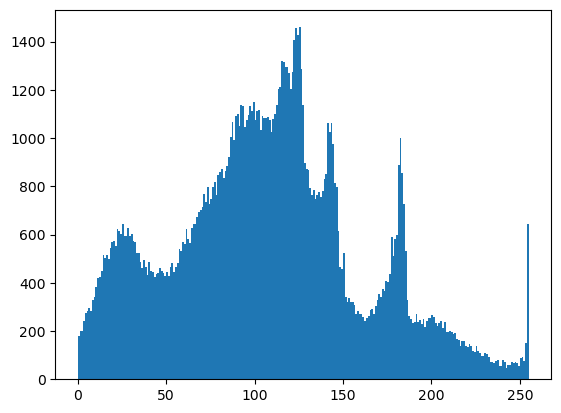

In [5]:
# Charger l'image comme matrice de pixels
img = np.array(resized_dogo)

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

## Fonction de manipulation des images

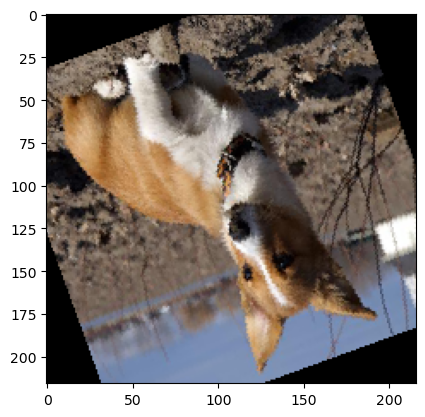

In [10]:
def apply_rotation_random(img):
    return img.rotate(random.randrange(-180, 180))

plt.imshow(apply_rotation_random(resized_dogo))

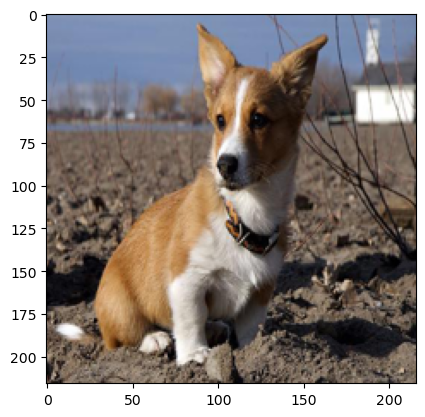

In [15]:
def apply_flip_random(img):
    return img.transpose(random.choice([Image.FLIP_LEFT_RIGHT, Image.FLIP_TOP_BOTTOM]))

plt.imshow(apply_flip_random(resized_dogo))

Taille actuelle :  (216, 216)


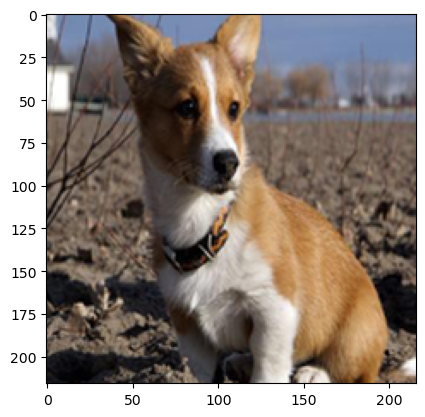

In [37]:
def apply_zoom_random(img, target_size=(216, 216), zoom_range=(0.8, 1)):
    # Taille actuelle de l'image
    width, height = img.size
    
    # Déterminer le facteur de zoom
    zoom_factor = random.uniform(*zoom_range)
    
    # Calculer les nouvelles dimensions de l'image zoomée
    new_width = int(width * zoom_factor)
    new_height = int(height * zoom_factor)
    
    # S'assurer que les nouvelles dimensions ne dépassent pas celles de l'image d'origine
    new_width = min(new_width, width)
    new_height = min(new_height, height)
    
    # Choisir aléatoirement les coordonnées du coin supérieur gauche du rectangle de zoom
    x1 = random.randint(0, width - new_width)
    y1 = random.randint(0, height - new_height)
    x2 = x1 + new_width
    y2 = y1 + new_height
    
    # Recadrer l'image zoomée pour revenir à la taille cible
    zoomed_img = img.crop((x1, y1, x2, y2))
    zoomed_img = zoomed_img.resize(target_size, Image.LANCZOS)    
    return zoomed_img

doggo_random_resized = apply_zoom_random(resized_dogo)
print("Taille actuelle : ", doggo_random_resized.size)
plt.imshow(doggo_random_resized)

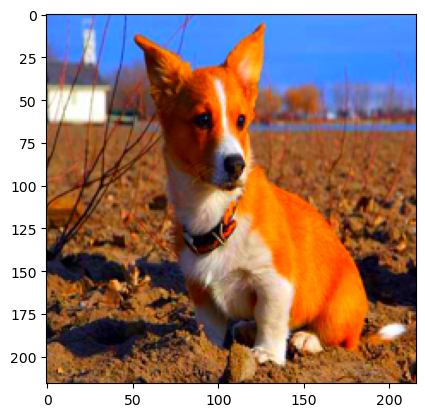

In [45]:
def apply_color_adjustment_random(img,max_colour=8):
    chosen_interval = random.choices([(0, 1), (1, max_colour)], weights=[0.5, 0.5])[0]
    factor =  random.uniform(chosen_interval[0], chosen_interval[1])
    return ImageEnhance.Color(img).enhance(factor)

plt.imshow(apply_color_adjustment_random(resized_dogo))

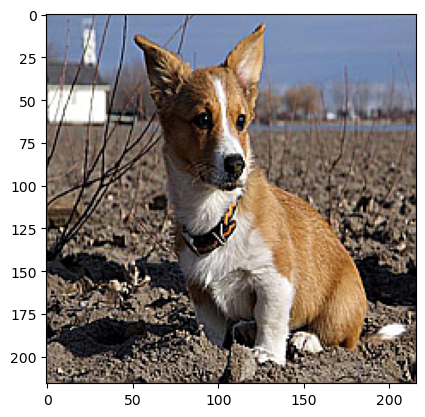

In [51]:
def apply_constrast_random(img,random=random.randint(1, 25)):
    return ImageEnhance.Sharpness(img).enhance(random)

plt.imshow(apply_constrast_random(resized_dogo))

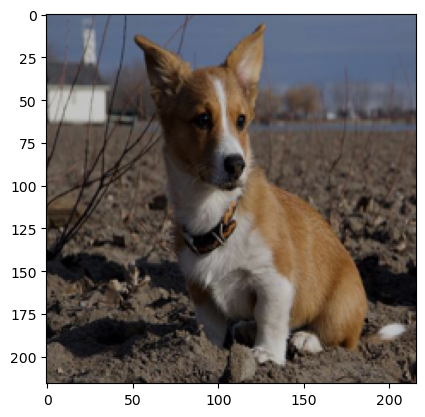

In [58]:
def apply_brightness_random(img,random=random.uniform(0.1, 0.9)):
    return ImageEnhance.Brightness(img).enhance(random)

plt.imshow(apply_brightness_random(resized_dogo))

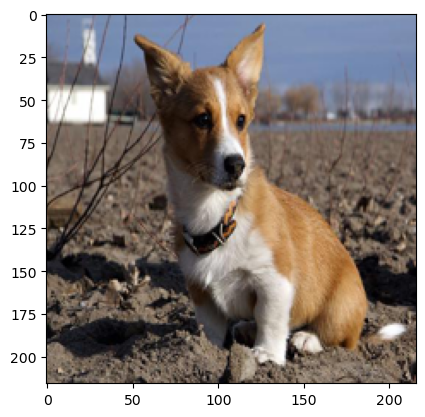

In [63]:
def apply_gaussian_blur_random(img,random=random.uniform(0, 2)):
    return img.filter(ImageFilter.GaussianBlur(random))

plt.imshow(apply_gaussian_blur_random(resized_dogo))

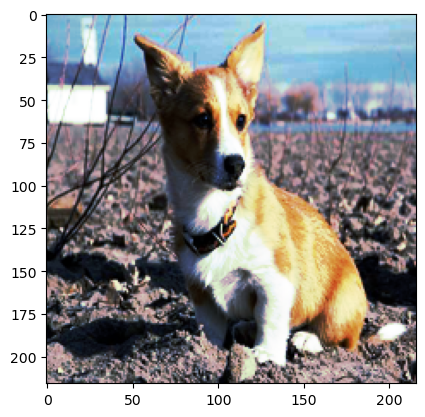

In [72]:
def apply_equalize_random(img,random=random.uniform(0, 2)):
    return ImageOps.equalize(img)

plt.imshow(apply_equalize_random(resized_dogo))

## Application aléatoire des manipulations

In [123]:
def weighted_random_choice(n):
    weights = np.linspace(n, 1, n) ** 2  # Crée une distribution avec des poids exponentiels décroissants
    print(weights)
    weights = weights / weights.sum()
    return random.choices(range(1, n + 1), weights)[0]

[81. 64. 49. 36. 25. 16.  9.  4.  1.]
[0.28421053 0.2245614  0.17192982 0.12631579 0.0877193  0.05614035
 0.03157895 0.01403509 0.00350877]


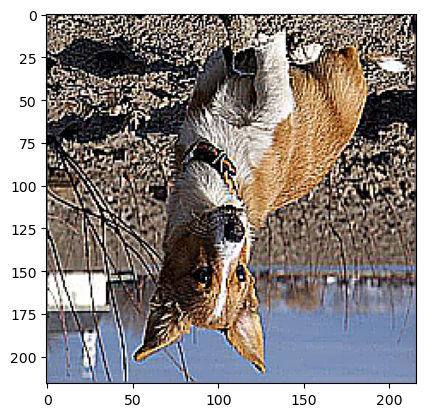

In [124]:
custom_image_functions = [
    apply_rotation_random,
    apply_flip_random,
    apply_zoom_random,
    apply_color_adjustment_random,
    apply_constrast_random,
    apply_brightness_random,
    apply_gaussian_blur_random,
    apply_equalize_random,
]

def apply_alteration_random(img):
    #num_functions = random.randint(1, len(custom_image_functions))
    num_functions = weighted_random_choice(len(custom_image_functions)+1)
    modified_image = img.copy()
    for _ in range(num_functions):
        random_function = random.choice(custom_image_functions)
        modified_image = random_function(modified_image)    
    return modified_image

plt.imshow(apply_alteration_random(resized_dogo))